### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)


### Loading data

In [2]:
df1=pd.read_csv("Online_Sales.csv")
df2=pd.read_csv("Discount_Coupon.csv")
df3=pd.read_csv("Customers_Data.csv")
df4=pd.read_csv("Marketing_Spend.csv")
df5=pd.read_csv("Tax_Amount.csv")

#### Calculate Invoice amount or sale_amount or revenue for each transaction and item level Invoice Value =(( QuantityAvg_price)(1-Dicount_pct)*(1+GST))+Delivery_Charges

#### Merge dataset

In [3]:
# Merge online sales data with discount coupons data based on product category
df_merged=pd.merge(df1, df2, on='Product_Category', how='left')

In [4]:
# Merge result with GST info
df_merged=pd.merge(df_merged, df5, on='Product_Category', how='left')

In [5]:
df_merged['GST']=df_merged['GST'].replace('%','',regex=True)

df_merged['GST']=pd.to_numeric(df_merged['GST'],errors='coerce')/100

df_merged['Discount_pct']=pd.to_numeric(df_merged['Discount_pct'],errors='coerce')/100


In [6]:
print(df_merged.isnull().sum())

CustomerID               0
Transaction_ID           0
Transaction_Date         0
Product_SKU              0
Product_Description      0
Product_Category         0
Quantity                 0
Avg_Price                0
Delivery_Charges         0
Coupon_Status            0
Month                  400
Coupon_Code            400
Discount_pct           400
GST                      0
dtype: int64


In [7]:
#Fill missing values in Coupon_Code, Discount_pct, and Month_y columns
df_merged['Coupon_Code'].fillna('No Coupon', inplace=True)
df_merged['Discount_pct'].fillna(0, inplace=True)  # No discount if missing
print(df_merged.isnull().sum())

CustomerID               0
Transaction_ID           0
Transaction_Date         0
Product_SKU              0
Product_Description      0
Product_Category         0
Quantity                 0
Avg_Price                0
Delivery_Charges         0
Coupon_Status            0
Month                  400
Coupon_Code              0
Discount_pct             0
GST                      0
dtype: int64


C:\Users\AMEYA RAJESH PATIL\AppData\Local\Temp\ipykernel_27292\3342323106.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['Coupon_Code'].fillna('No Coupon', inplace=True)
C:\Users\AMEYA RAJESH PATIL\AppData\Local\Temp\ipykernel_27292\3342323106.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [8]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630688 entries, 0 to 630687
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CustomerID           630688 non-null  int64  
 1   Transaction_ID       630688 non-null  int64  
 2   Transaction_Date     630688 non-null  object 
 3   Product_SKU          630688 non-null  object 
 4   Product_Description  630688 non-null  object 
 5   Product_Category     630688 non-null  object 
 6   Quantity             630688 non-null  int64  
 7   Avg_Price            630688 non-null  float64
 8   Delivery_Charges     630688 non-null  float64
 9   Coupon_Status        630688 non-null  object 
 10  Month                630288 non-null  object 
 11  Coupon_Code          630688 non-null  object 
 12  Discount_pct         630688 non-null  float64
 13  GST                  630688 non-null  float64
dtypes: float64(4), int64(3), object(7)
memory usage: 67.4+ MB


In [9]:
df_merged.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,0.1,0.1
1,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Feb,ELEC20,0.2,0.1
2,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Mar,ELEC30,0.3,0.1
3,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Apr,ELEC10,0.1,0.1
4,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,May,ELEC20,0.2,0.1


In [10]:
# now calculate invoice value
df_merged['Invoice_Value']=(
    (df_merged['Quantity']*df_merged['Avg_Price'])*
    (1-df_merged['Discount_pct'])*
    (1+df_merged['GST'])+
    df_merged['Delivery_Charges']
)

In [11]:
df_merged

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice_Value
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,0.1,0.1,158.6729
1,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Feb,ELEC20,0.2,0.1,141.7648
2,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Mar,ELEC30,0.3,0.1,124.8567
3,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Apr,ELEC10,0.1,0.1,158.6729
4,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,May,ELEC20,0.2,0.1,141.7648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630683,14600,48497,12/31/2019,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4,80.52,19.99,Clicked,Aug,ELEC20,0.2,0.1,303.4204
630684,14600,48497,12/31/2019,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4,80.52,19.99,Clicked,Sep,ELEC30,0.3,0.1,267.9916
630685,14600,48497,12/31/2019,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4,80.52,19.99,Clicked,Oct,ELEC10,0.1,0.1,338.8492
630686,14600,48497,12/31/2019,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4,80.52,19.99,Clicked,Nov,ELEC20,0.2,0.1,303.4204


### Perform Detailed exploratory analysis
#### 1.Understanding how many customers acquired every month

In [12]:
df1['Month']=pd.to_datetime(df1['Transaction_Date']).dt.month

In [13]:
df1['Month'].value_counts()

Month
8     6150
7     5251
5     4572
12    4502
3     4346
9     4288
6     4193
10    4164
4     4150
1     4063
11    3961
2     3284
Name: count, dtype: int64

In [14]:
df1['Month'].isnull().sum()

0

In [15]:
df1.groupby('Month')['CustomerID'].count()

Month
1     4063
2     3284
3     4346
4     4150
5     4572
6     4193
7     5251
8     6150
9     4288
10    4164
11    3961
12    4502
Name: CustomerID, dtype: int64

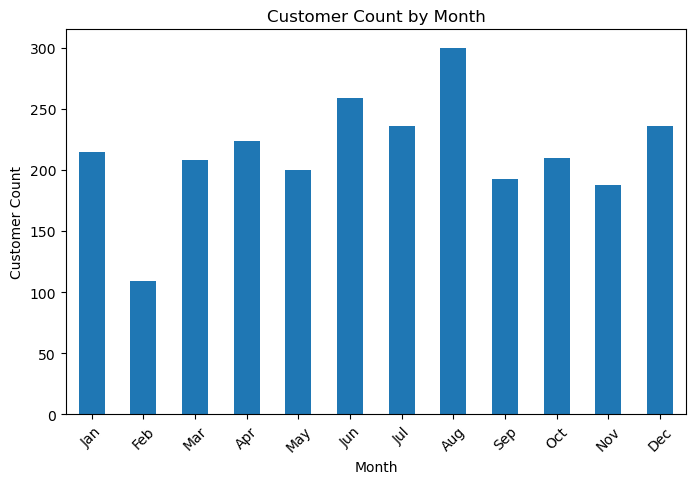

In [16]:
plt.figure(figsize=(8,5))
plot=df1.groupby('Month')['CustomerID'].nunique().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Customer Count')
plt.title('Customer Count by Month')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


In [17]:
df_merged

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice_Value
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,0.1,0.1,158.6729
1,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Feb,ELEC20,0.2,0.1,141.7648
2,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Mar,ELEC30,0.3,0.1,124.8567
3,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Apr,ELEC10,0.1,0.1,158.6729
4,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,May,ELEC20,0.2,0.1,141.7648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630683,14600,48497,12/31/2019,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4,80.52,19.99,Clicked,Aug,ELEC20,0.2,0.1,303.4204
630684,14600,48497,12/31/2019,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4,80.52,19.99,Clicked,Sep,ELEC30,0.3,0.1,267.9916
630685,14600,48497,12/31/2019,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4,80.52,19.99,Clicked,Oct,ELEC10,0.1,0.1,338.8492
630686,14600,48497,12/31/2019,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4,80.52,19.99,Clicked,Nov,ELEC20,0.2,0.1,303.4204


#### 2.Understand the retention of customers on a month-on-month basis

In [18]:
# Get unique customers for each month
monthly_customers = df1.groupby('Month')['CustomerID'].unique()

In [19]:
retention = [0]# First month has no previous month to compare
for i in range(1,12):
    prev_cust=set(monthly_customers.get(i,[]))
    curr_cust=set(monthly_customers.get(i+1,[]))

    if len(prev_cust)>0:
        retained_cust=len(prev_cust.intersection(curr_cust))
        retention.append((retained_cust/len(prev_cust))*100)
    else:
        retention.append(0)

In [20]:
retention_df=pd.DataFrame({'Month':range(1,13), 'Retention_Rate':retention})
print(retention_df)

    Month  Retention_Rate
0       1        0.000000
1       2        6.046512
2       3       10.091743
3       4       11.538462
4       5       11.160714
5       6       18.500000
6       7       22.393822
7       8       27.542373
8       9       14.666667
9      10       15.025907
10     11       14.761905
11     12       14.893617


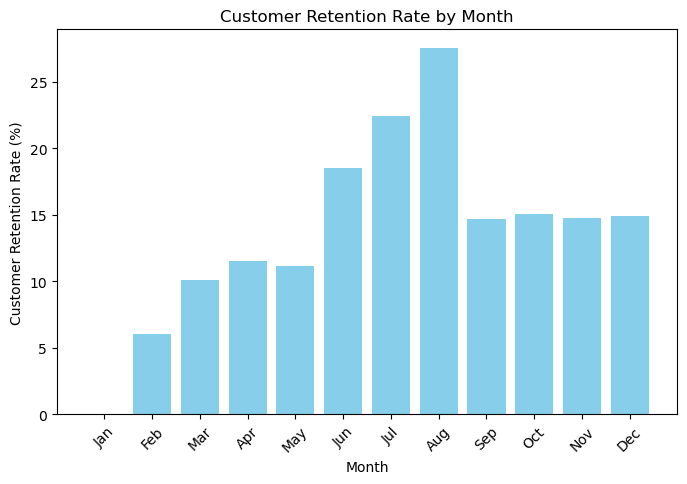

In [21]:
# Plot retention rate
plt.figure(figsize=(8,5))
plt.bar(retention_df['Month'], retention_df['Retention_Rate'], color='skyblue')

# Labels and title
plt.xlabel('Month')
plt.ylabel('Customer Retention Rate (%)')
plt.title('Customer Retention Rate by Month')

# Customize x-axis with month names
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Show the plot
plt.show()

#### 3.How the revenues from existing/new customers on a month-on-month basis

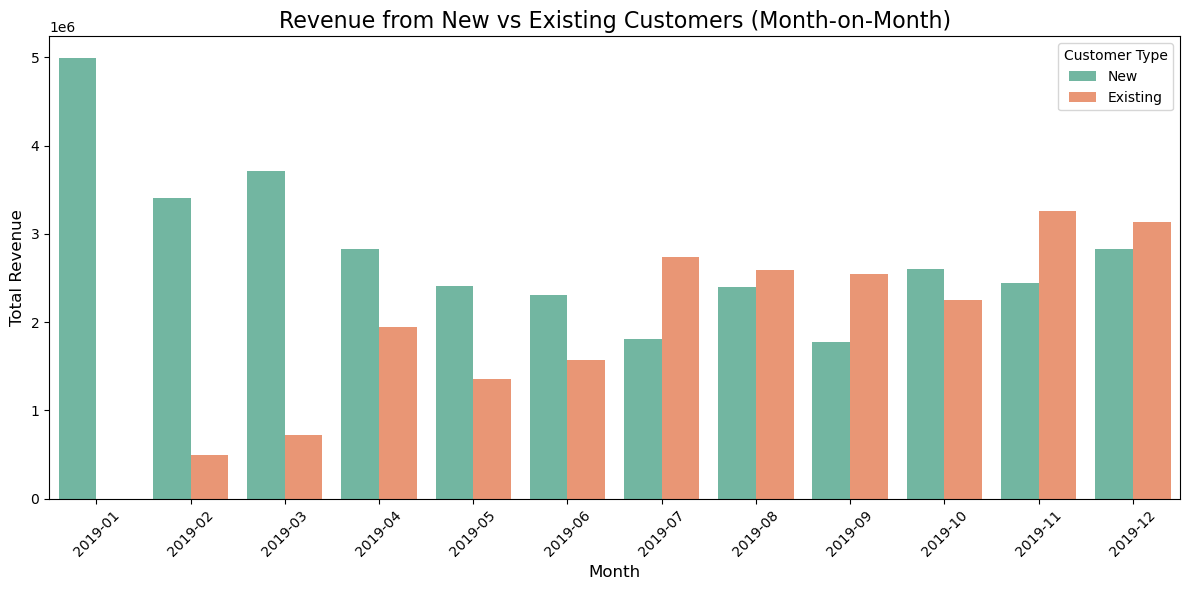

In [22]:
 # Step 1: Convert the 'Transaction_Date' to datetime format and extract 'Month'
df_merged['Transaction_Date'] = pd.to_datetime(df_merged['Transaction_Date'])
df_merged['Month'] = df_merged['Transaction_Date'].dt.to_period('M')

# Step 2: Get the first purchase month for each customer
first_purchase_month = df_merged.groupby('CustomerID')['Month'].min().reset_index()
first_purchase_month = first_purchase_month.rename(columns={'Month': 'First_Purchase_Month'})

# Step 3: Merge the first purchase month back into the main dataframe
df_merged = df_merged.merge(first_purchase_month, on='CustomerID', how='left')

# Step 4: Classify customers as 'New' or 'Existing' based on their purchase month
df_merged['Customer_Type'] = df_merged.apply(
    lambda row: 'New' if row['Month'] == row['First_Purchase_Month'] else 'Existing', axis=1
)

# Step 5: Calculate total revenue for each group (New vs Existing) on a month-by-month basis
monthly_revenue = df_merged.groupby(['Month', 'Customer_Type'])['Invoice_Value'].sum().reset_index()

# Step 6: Plot the data as a group bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_revenue, x='Month', y='Invoice_Value', hue='Customer_Type', palette='Set2')

# Adding labels and title
plt.title('Revenue from New vs Existing Customers (Month-on-Month)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Customer Type')

# Show the plot
plt.tight_layout()
plt.show()


In [23]:
df_merged

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice_Value,First_Purchase_Month,Customer_Type
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,2019-01,ELEC10,0.1,0.1,158.6729,2019-01,New
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,2019-01,ELEC20,0.2,0.1,141.7648,2019-01,New
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,2019-01,ELEC30,0.3,0.1,124.8567,2019-01,New
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,2019-01,ELEC10,0.1,0.1,158.6729,2019-01,New
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,2019-01,ELEC20,0.2,0.1,141.7648,2019-01,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630683,14600,48497,2019-12-31,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4,80.52,19.99,Clicked,2019-12,ELEC20,0.2,0.1,303.4204,2019-12,New
630684,14600,48497,2019-12-31,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4,80.52,19.99,Clicked,2019-12,ELEC30,0.3,0.1,267.9916,2019-12,New
630685,14600,48497,2019-12-31,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4,80.52,19.99,Clicked,2019-12,ELEC10,0.1,0.1,338.8492,2019-12,New
630686,14600,48497,2019-12-31,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4,80.52,19.99,Clicked,2019-12,ELEC20,0.2,0.1,303.4204,2019-12,New


#### 4.How the discounts play a role in the revenues

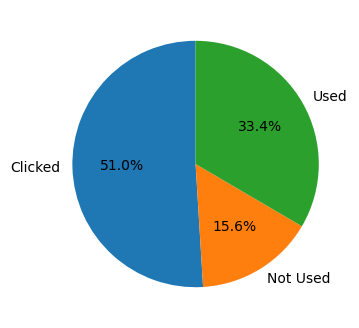

In [24]:
revenue_group=df_merged.groupby('Coupon_Status')['Invoice_Value'].sum()
plt.figure(figsize=(4,4))
plt.pie(revenue_group, labels=revenue_group.index, autopct='%1.1f%%', startangle=90)
plt.show()

#### 5. Which product was purchased mostly based on the quantity

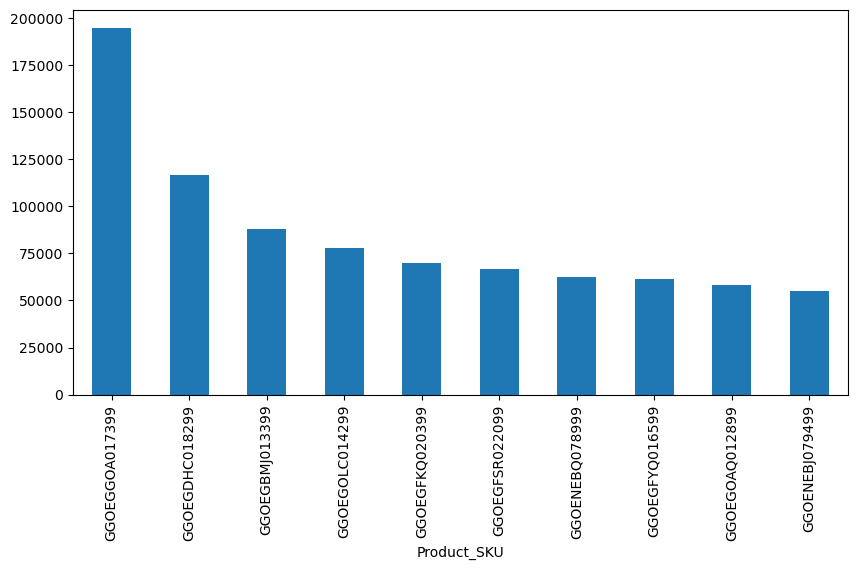

In [25]:
prod_quantity=df_merged.groupby('Product_SKU')['Quantity'].sum()
top_category=prod_quantity.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_category.plot(kind='bar')
plt.show()

#### 6."Analyze key performance indicators (KPIs) such as revenue, order count, average order value, customer count (existing and new),and quantity, sorted by category, month, week, and day. Simplify this as:
i. Top 5 revenue days.
ii. Top 5 revenue weeks.
iii. Top 2 revenue months."

In [26]:

# Create new columns for analysis
df_merged['Month'] = df_merged['Transaction_Date'].dt.to_period('M')  # Monthly
df_merged['Week'] = df_merged['Transaction_Date'].dt.to_period('W')  # Weekly
df_merged['Day'] = df_merged['Transaction_Date'].dt.date  # Daily

# Group by day, week, and month, then calculate total revenue
daily_revenue = df_merged.groupby('Day')['Invoice_Value'].sum()
weekly_revenue = df_merged.groupby('Week')['Invoice_Value'].sum()
monthly_revenue = df_merged.groupby('Month')['Invoice_Value'].sum()

# Get top revenue days, weeks, and months
top_5_days = daily_revenue.sort_values(ascending=False).head(5)
top_5_weeks = weekly_revenue.sort_values(ascending=False).head(5)
top_2_months = monthly_revenue.sort_values(ascending=False).head(2)

# Print results
print("Top 5 Revenue Days:\n", top_5_days)
print("\nTop 5 Revenue Weeks:\n", top_5_weeks)
print("\nTop 2 Revenue Months:\n", top_2_months)


Top 5 Revenue Days:
 Day
2019-11-27    591213.63840
2019-04-05    581816.51276
2019-04-18    533388.16636
2019-08-02    445211.35336
2019-07-18    422485.40256
Name: Invoice_Value, dtype: float64

Top 5 Revenue Weeks:
 Week
2019-12-09/2019-12-15    1.706441e+06
2019-11-25/2019-12-01    1.667957e+06
2019-12-02/2019-12-08    1.564136e+06
2019-12-16/2019-12-22    1.561166e+06
2019-04-15/2019-04-21    1.462126e+06
Freq: W-SUN, Name: Invoice_Value, dtype: float64

Top 2 Revenue Months:
 Month
2019-12    5.962900e+06
2019-11    5.706206e+06
Freq: M, Name: Invoice_Value, dtype: float64


#### 7.Understand the trends/seasonality of sales by category, location, month, etc.
#### How the number of orders varies and sales with different days

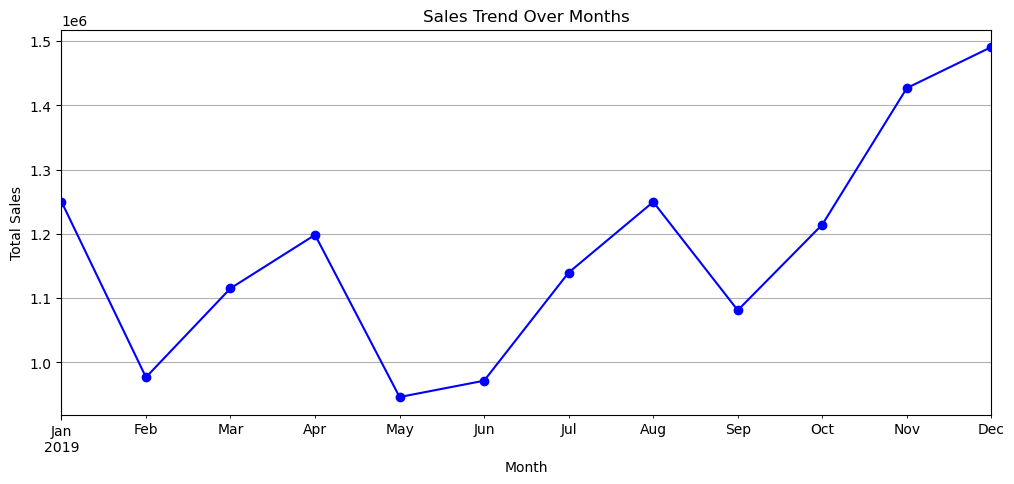

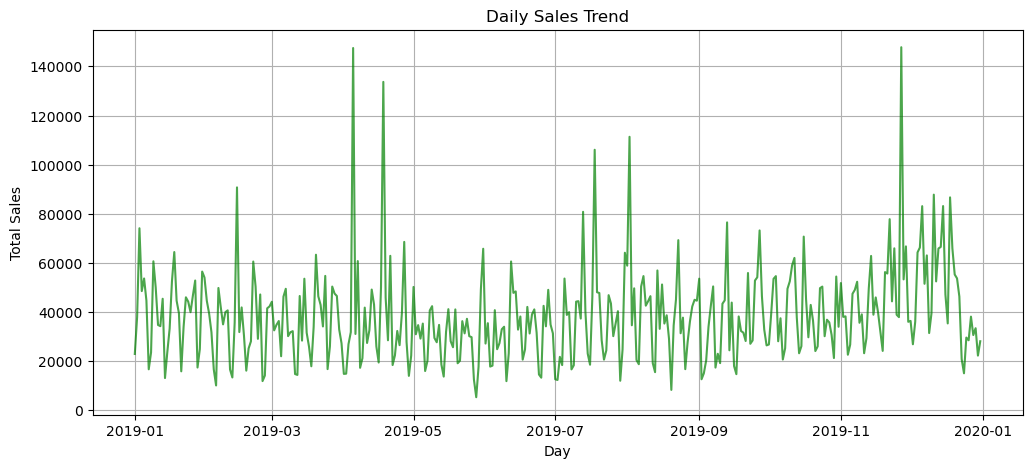

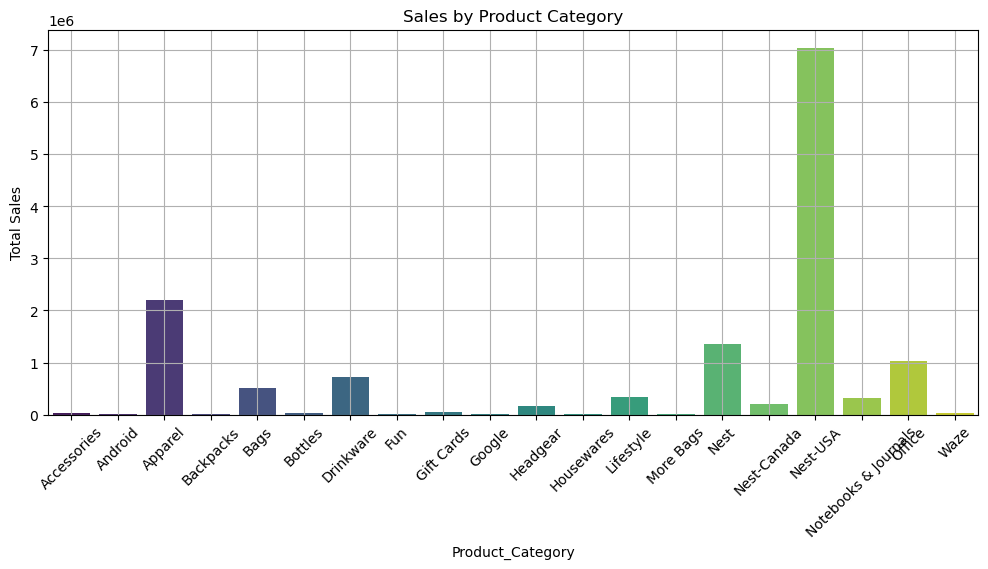

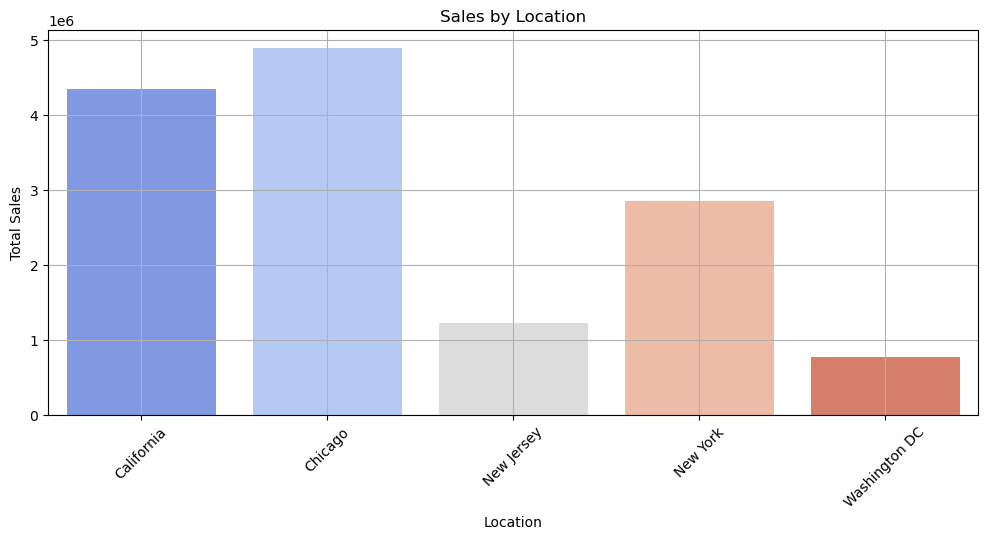

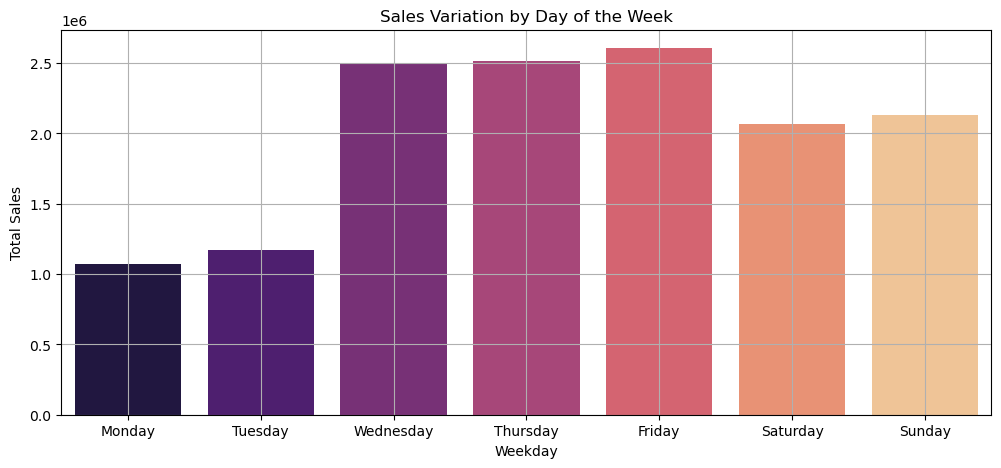

In [27]:
df_merged['Weekday'] = df_merged['Transaction_Date'].dt.day_name()  # Weekday Name
df_merged['Day'] = df_merged['Transaction_Date'].dt.date  # Daily

df_merged=pd.merge(df_merged, df3, on='CustomerID', how='left')
df_merged.drop_duplicates(inplace=True)
# Aggregate data
monthly_sales = df_merged.groupby('Month')['Invoice_Value'].sum()
daily_sales = df_merged.groupby('Day')['Invoice_Value'].sum()
category_sales = df_merged.groupby('Product_Category')['Invoice_Value'].sum()
location_sales = df_merged.groupby('Location')['Invoice_Value'].sum()
weekday_sales = df_merged.groupby('Weekday')['Invoice_Value'].sum()

# Sort weekdays in correct order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales = weekday_sales.reindex(weekday_order)

# Plot sales trend over months
plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title("Sales Trend Over Months")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

# Plot daily sales trend
plt.figure(figsize=(12, 5))
daily_sales.plot(kind='line', color='g', alpha=0.7)
plt.title("Daily Sales Trend")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

# Plot sales by category
plt.figure(figsize=(12, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.title("Sales by Product Category")
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.grid()
plt.show()

# Plot sales by location
plt.figure(figsize=(12, 5))
sns.barplot(x=location_sales.index, y=location_sales.values, palette='coolwarm')
plt.title("Sales by Location")
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.grid()
plt.show()

# Plot sales variation by weekday
plt.figure(figsize=(12, 5))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='magma')
plt.title("Sales Variation by Day of the Week")
plt.ylabel("Total Sales")
plt.grid()
plt.show()


#### 8.Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month

In [28]:
df_merged


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,GST,Invoice_Value,First_Purchase_Month,Customer_Type,Week,Day,Weekday,Gender,Location,Tenure_Months
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,0.1,158.6729,2019-01,New,2018-12-31/2019-01-06,2019-01-01,Tuesday,M,Chicago,12
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,0.1,141.7648,2019-01,New,2018-12-31/2019-01-06,2019-01-01,Tuesday,M,Chicago,12
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,0.1,124.8567,2019-01,New,2018-12-31/2019-01-06,2019-01-01,Tuesday,M,Chicago,12
12,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,0.1,158.6729,2019-01,New,2018-12-31/2019-01-06,2019-01-01,Tuesday,M,Chicago,12
13,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,0.1,141.7648,2019-01,New,2018-12-31/2019-01-06,2019-01-01,Tuesday,M,Chicago,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630665,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,...,0.1,360.7880,2019-12,New,2019-12-30/2020-01-05,2019-12-31,Tuesday,F,California,7
630666,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,...,0.1,316.5020,2019-12,New,2019-12-30/2020-01-05,2019-12-31,Tuesday,F,California,7
630676,14600,48497,2019-12-31,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4,80.52,19.99,Clicked,...,0.1,338.8492,2019-12,New,2019-12-30/2020-01-05,2019-12-31,Tuesday,F,California,7
630677,14600,48497,2019-12-31,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4,80.52,19.99,Clicked,...,0.1,303.4204,2019-12,New,2019-12-30/2020-01-05,2019-12-31,Tuesday,F,California,7


      Month  Invoice_Value  Offline_Spend  Online_Spend  \
0   2019-01   1.250162e+06          96600      58328.95   
1   2019-02   9.765579e+05          81300      55807.92   
2   2019-03   1.115053e+06          73500      48750.09   
3   2019-04   1.198266e+06          96000      61026.83   
4   2019-05   9.458322e+05          65500      52759.64   
5   2019-06   9.712534e+05          80500      53818.14   
6   2019-07   1.139631e+06          67500      52717.85   
7   2019-08   1.249559e+06          85500      57404.15   
8   2019-09   1.080919e+06          83000      52514.54   
9   2019-10   1.214345e+06          93500      57724.65   
10  2019-11   1.426867e+06          93000      68144.96   
11  2019-12   1.490725e+06         122000      76648.75   

    Total_Marketing_Spend  Marketing_Spend_%     Tax_Amount  \
0               154928.95          12.392710  146198.336778   
1               137107.92          14.039917  120511.423505   
2               122250.09          10.96361

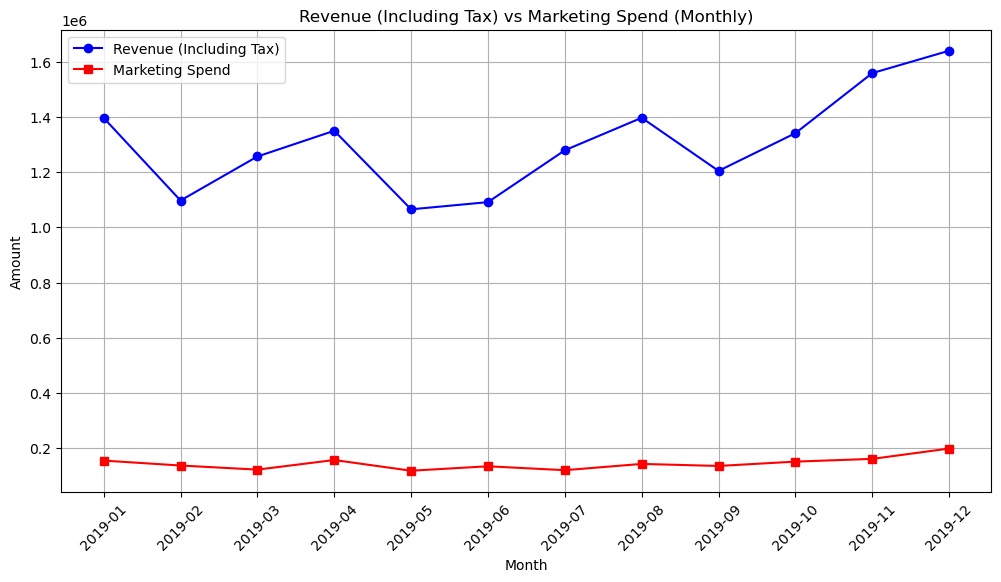

In [29]:
# Calculate Total Revenue per Month
monthly_revenue = df_merged.groupby('Month')['Invoice_Value'].sum().reset_index()

# Convert Date in Marketing Spend and Extract Month
df4['Date'] = pd.to_datetime(df4['Date'])
df4['Month'] = df4['Date'].dt.to_period('M')

# Summarize Marketing Spend per Month
monthly_marketing = df4.groupby('Month')[['Offline_Spend', 'Online_Spend']].sum().reset_index()

# Merge Revenue and Marketing Spend Data
summary = pd.merge(monthly_revenue, monthly_marketing, on='Month', how='left')

# Calculate Total Marketing Spend and Percentage of Revenue
summary['Total_Marketing_Spend'] = summary['Offline_Spend'] + summary['Online_Spend']
summary['Marketing_Spend_%'] = (summary['Total_Marketing_Spend'] / summary['Invoice_Value']) * 100

# Ensure GST values are cleaned and converted
df5['GST'] = df5['GST'].replace('%', '', regex=True).astype(float) / 100

# Merge GST info with df_merged (already done in your setup)
# Calculate Total Tax per Month
df_merged['Tax_Amount'] = df_merged['Invoice_Value'] * df_merged['GST']
monthly_tax = df_merged.groupby('Month')['Tax_Amount'].sum().reset_index()

# Merge Tax Data with Summary
summary = pd.merge(summary, monthly_tax, on='Month', how='left')

# Adjust Total Revenue to Include Tax
summary['Revenue_Including_Tax'] = summary['Invoice_Value'] + summary['Tax_Amount']

# Calculate Delivery Charges per Month
monthly_delivery = df_merged.groupby('Month')['Delivery_Charges'].sum().reset_index()
summary = pd.merge(summary, monthly_delivery, on='Month', how='left')

# Calculate Delivery Charges as a Percentage of Revenue
summary['Delivery_Charges_%'] = (summary['Delivery_Charges'] / summary['Invoice_Value']) * 100

# Display Final Summary
print(summary)

# Plot Revenue (Including Tax) vs Marketing Spend
plt.figure(figsize=(12, 6))
plt.plot(summary['Month'].astype(str), summary['Revenue_Including_Tax'], marker='o', label="Revenue (Including Tax)", color='b')
plt.plot(summary['Month'].astype(str), summary['Total_Marketing_Spend'], marker='s', label="Marketing Spend", color='r')
plt.xticks(rotation=45)
plt.title("Revenue (Including Tax) vs Marketing Spend (Monthly)")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.legend()
plt.grid()
plt.show()

#### How marketing spend is impacting on revenue

In [30]:
corr=summary['Total_Marketing_Spend'].corr(summary['Invoice_Value'])
print(f'Correlation between market_spend_% and Invoice: {corr}')                                        

Correlation between market_spend_% and Invoice: 0.8296653503217232


## Performing Customer Segmentation
Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, Standard customers and define a strategy on the same Scientific (Using K-Means) & Understand the profiles. Define a strategy for each segmentent.

RFM Segmentation (Recency, Frequency, Monetary)


RFM Segmentation is a popular approach:


Recency (R) → How recently a customer made a purchase


Frequency (F) → How often a customer purchases


Monetary (M) → How much they spend in total

there is a change as we should only categories it into 4 


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans

In [32]:
#Calculate total revenue per customer
customer_revenue = df_merged.groupby('CustomerID')['Invoice_Value'].sum().reset_index()
#customer_revenue.rename(columns={'Invoice_Value': 'Total_Revenue'}, inplace=True)

#Define Value-Based Segmentation
quantiles = customer_revenue['Invoice_Value'].quantile([0.90, 0.70, 0.40])  # Top 10%, 30%, 60%
def assign_value_segment(revenue):
    if revenue >= quantiles[0.90]: return 'Premium'
    elif revenue >= quantiles[0.70]: return 'Gold'
    elif revenue >= quantiles[0.40]: return 'Silver'
    else: return 'Standard'
customer_revenue['Value_Segment'] = customer_revenue['Invoice_Value'].apply(assign_value_segment)

#Calculate RFM Metrics
df_merged['Transaction_Date'] = pd.to_datetime(df_merged['Transaction_Date'])
latest_date = df_merged['Transaction_Date'].max()  # Last transaction date

rfm = df_merged.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (latest_date - x.max()).days,  # Recency
    'Transaction_ID': 'count',  # Frequency
    'Invoice_Value': 'sum'  # Monetary
}).reset_index()

# Rename columns
rfm.rename(columns={'Transaction_Date': 'Recency', 'Transaction_ID': 'Frequency', 'Invoice_Value': 'Monetary'}, inplace=True)

#Create RFM Scores (1-4 scale)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])  # Lower Recency = Higher Score
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])  # Higher Frequency = Higher Score
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])  # Higher Monetary = Higher Score

#Combine RFM Score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

#Define RFM Segments
def rfm_segment(score):
    if score in ['444', '443', '434', '344']: return 'Loyal Customers'
    elif score in ['111', '112', '121', '211']: return 'Lost Customers'
    elif score in ['331', '332', '321', '312']: return 'Potential Loyalists'
    elif score in ['411', '412', '421', '431']: return 'New Customers'
    else: return 'Regular Customers'

rfm['RFM_Segment'] = rfm['RFM_Score'].apply(rfm_segment)

#Merge RFM Segments with Value-Based Segmentation
customer_segments = pd.merge(customer_revenue, rfm, on='CustomerID', how='inner')

# Display Results
print(customer_segments.head())


   CustomerID  Invoice_Value Value_Segment  Recency  Frequency     Monetary  \
0       12346      535.65168      Standard      107          6    535.65168   
1       12347    40114.69160       Premium       59        178  40114.69160   
2       12348     4541.17992        Silver       73         69   4541.17992   
3       12350     4003.64208        Silver       17         51   4003.64208   
4       12356     5738.62152        Silver      107        108   5738.62152   

  R_Score F_Score M_Score RFM_Score          RFM_Segment  
0       3       1       1       311    Regular Customers  
1       3       4       4       344      Loyal Customers  
2       3       3       2       332  Potential Loyalists  
3       4       2       2       422    Regular Customers  
4       3       3       3       333    Regular Customers  


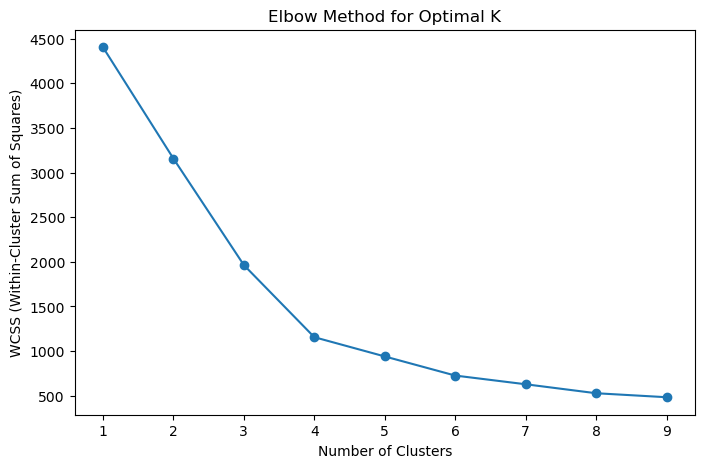


 Cluster Profiles:
             Recency    Frequency       Monetary
Cluster                                        
0         77.006614    78.636243    6754.406130
1        254.048825    61.799277    5192.331165
2         84.214286   360.766234   33571.709374
3         29.200000  1758.000000  182287.314744


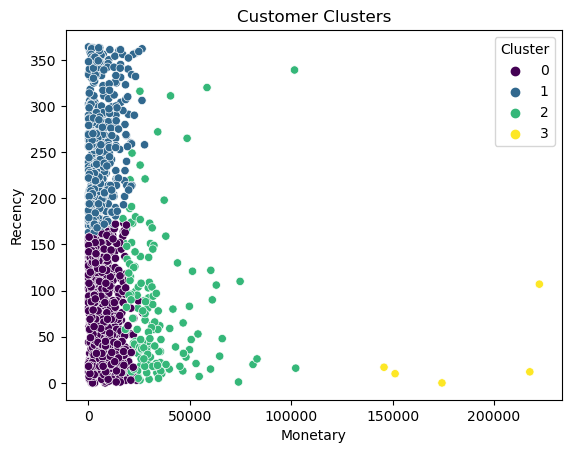

In [33]:
# Select Features for Clustering
rfm_features = customer_segments[['Recency', 'Frequency', 'Monetary']]

# Scale Data for K-Means
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Find Optimal K using Elbow Method
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Apply K-Means Clustering
optimal_k = 4  # Choose based on the elbow point
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_segments['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Cluster Profiling
cluster_profile = customer_segments.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print("\n Cluster Profiles:\n", cluster_profile)

# Visualize Clusters
sns.scatterplot(x=customer_segments['Monetary'], y=customer_segments['Recency'], hue=customer_segments['Cluster'], palette='viridis')
plt.xlabel('Monetary')
plt.ylabel('Recency')
plt.title('Customer Clusters')
plt.show()
#0 = "Silver"
#1 = "Standard"
#2 = "Gold"
#3 = "Premium"

### Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)
First, define a dependent variable with categories low value, medium value, high value using customer revenue Then perform a Classification model

In [34]:
#Load Data (Assuming df_merged contains transactions)
df_merged['Transaction_Date'] = pd.to_datetime(df_merged['Transaction_Date'])

#Calculate Customer Revenue
customer_revenue = df_merged.groupby('CustomerID')['Invoice_Value'].sum().reset_index()
customer_revenue.rename(columns={'Invoice_Value': 'Total_Revenue'}, inplace=True)

#Define CLV Categories
quantiles = customer_revenue['Total_Revenue'].quantile([0.33, 0.66])  # 33% and 66% percentiles

def classify_clv(value):
    if value <= quantiles[0.33]: return 'Low Value'
    elif value <= quantiles[0.66]: return 'Medium Value'
    else: return 'High Value'

customer_revenue['CLV_Category'] = customer_revenue['Total_Revenue'].apply(classify_clv)

#Display Results
print(customer_revenue.head())


   CustomerID  Total_Revenue  CLV_Category
0       12346      535.65168     Low Value
1       12347    40114.69160    High Value
2       12348     4541.17992  Medium Value
3       12350     4003.64208  Medium Value
4       12356     5738.62152  Medium Value


In [35]:
# Calculate RFM Features
latest_date = df_merged['Transaction_Date'].max()  # Last transaction date

rfm = df_merged.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (latest_date - x.max()).days,  # Recency
    'Transaction_ID': 'count',  # Frequency
    'Invoice_Value': 'sum'  # Monetary
}).reset_index()

#Rename columns
rfm.rename(columns={'Transaction_Date': 'Recency', 'Transaction_ID': 'Frequency', 'Invoice_Value': 'Monetary'}, inplace=True)

#Calculate Additional Features
rfm['Average_Order_Value'] = rfm['Monetary'] / rfm['Frequency']

# Merge with CLV Categories
df_final = pd.merge(customer_revenue, rfm, on='CustomerID', how='inner')

#Load Customer Demographics
df_final = pd.merge(df_final, df3[['CustomerID', 'Tenure_Months']], on='CustomerID', how='left')

#Calculate Purchase Frequency
df_final['Purchase_Frequency'] = df_final['Frequency'] / df_final['Tenure_Months']

# Display Final Dataset
print(df_final.head())


   CustomerID  Total_Revenue  CLV_Category  Recency  Frequency     Monetary  \
0       12346      535.65168     Low Value      107          6    535.65168   
1       12347    40114.69160    High Value       59        178  40114.69160   
2       12348     4541.17992  Medium Value       73         69   4541.17992   
3       12350     4003.64208  Medium Value       17         51   4003.64208   
4       12356     5738.62152  Medium Value      107        108   5738.62152   

   Average_Order_Value  Tenure_Months  Purchase_Frequency  
0            89.275280             31            0.193548  
1           225.363436             20            8.900000  
2            65.814202             39            1.769231  
3            78.502786             25            2.040000  
4            53.135384             31            3.483871  


In [36]:
# Check Class Distribution
print("\nCLV Category Distribution:\n", df_final["CLV_Category"].value_counts())

# Select Features & Target Variable
features = ['Recency', 'Frequency', 'Monetary', 'Average_Order_Value', 'Purchase_Frequency', 'Tenure_Months']
X = df_final[features]  # Feature matrix
y = df_final['CLV_Category']  # Target variable

# Encode Target Variable (Convert 'Low', 'Medium', 'High' to 0, 1, 2)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Debugging: Check Label Encoding Order
print("\nLabel Encoding Order:", label_encoder.classes_)  # Check mapping

# Check Unique Values in Encoded Target
print("\nUnique Values in y (Encoded Target):", np.unique(y))

# Split Data (Stratified to Ensure Class Balance in Train/Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# Check Distribution in Train/Test Split
print("\nTrain Class Distribution:\n", pd.Series(y_train).value_counts())
print("\nTest Class Distribution:\n", pd.Series(y_test).value_counts())

# Scale Features (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit & transform training data
X_test = scaler.transform(X_test)  # Transform test data

# Train Random Forest Classifier with Balanced Class Weights
clf = RandomForestClassifier(n_estimators=100, max_depth=5, class_weight="balanced", random_state=42)
clf.fit(X_train, y_train)  # Train the model

# Make Predictions
y_pred = clf.predict(X_test)

# Check Unique Predictions (To Ensure Model is Predicting All Classes)
print("\nUnique Predicted Classes:", np.unique(y_pred))

# Print Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print Accuracy Score
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))




CLV Category Distribution:
 CLV_Category
High Value      499
Low Value       485
Medium Value    484
Name: count, dtype: int64

Label Encoding Order: ['High Value' 'Low Value' 'Medium Value']

Unique Values in y (Encoded Target): [0 1 2]

Train Class Distribution:
 0    399
1    388
2    387
Name: count, dtype: int64

Test Class Distribution:
 0    100
2     97
1     97
Name: count, dtype: int64

Unique Predicted Classes: [0 1 2]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      0.99      0.99        97
           2       0.99      1.00      0.99        97

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294


Accuracy Score: 0.9965986394557823


### Cross-Selling (Which products are selling together)
You can perform exploratory analysis & market basket analysis to understand which items can be bundled together

In [37]:
df_merged.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Invoice_Value,First_Purchase_Month,Customer_Type,Week,Day,Weekday,Gender,Location,Tenure_Months,Tax_Amount
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,158.6729,2019-01,New,2018-12-31/2019-01-06,2019-01-01,Tuesday,M,Chicago,12,15.86729
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,141.7648,2019-01,New,2018-12-31/2019-01-06,2019-01-01,Tuesday,M,Chicago,12,14.17648
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,124.8567,2019-01,New,2018-12-31/2019-01-06,2019-01-01,Tuesday,M,Chicago,12,12.48567
12,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,158.6729,2019-01,New,2018-12-31/2019-01-06,2019-01-01,Tuesday,M,Chicago,12,15.86729
13,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,141.7648,2019-01,New,2018-12-31/2019-01-06,2019-01-01,Tuesday,M,Chicago,12,14.17648


In [38]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157972 entries, 0 to 630678
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   CustomerID            157972 non-null  int64         
 1   Transaction_ID        157972 non-null  int64         
 2   Transaction_Date      157972 non-null  datetime64[ns]
 3   Product_SKU           157972 non-null  object        
 4   Product_Description   157972 non-null  object        
 5   Product_Category      157972 non-null  object        
 6   Quantity              157972 non-null  int64         
 7   Avg_Price             157972 non-null  float64       
 8   Delivery_Charges      157972 non-null  float64       
 9   Coupon_Status         157972 non-null  object        
 10  Month                 157972 non-null  period[M]     
 11  Coupon_Code           157972 non-null  object        
 12  Discount_pct          157972 non-null  float64       
 13  GST 

In [39]:
# Group by Transaction_ID and aggregate Product_SKUs bought together
df_products = df_merged.groupby('Transaction_ID')['Product_Category'].apply(list).reset_index()

# Preview the aggregated data
print(df_products.head())

   Transaction_ID                                   Product_Category
0           16679                     [Nest-USA, Nest-USA, Nest-USA]
1           16680                     [Nest-USA, Nest-USA, Nest-USA]
2           16681                           [Office, Office, Office]
3           16682  [Apparel, Apparel, Apparel, Bags, Bags, Bags, ...
4           16684  [Nest-USA, Nest-USA, Nest-USA, Nest-USA, Nest-...


In [40]:
from sklearn.preprocessing import MultiLabelBinarizer


from mlxtend.frequent_patterns import apriori, association_rules

In [41]:
# Apply One-Hot Encoding using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
product_one_hot = mlb.fit_transform(df_products['Product_Category'])

# Convert the matrix back to a DataFrame
product_df = pd.DataFrame(product_one_hot, columns=mlb.classes_, index=df_products['Transaction_ID'])
# Preview the one-hot encoded dataframe
print(product_df.head())

                Accessories  Android  Apparel  Backpacks  Bags  Bottles  \
Transaction_ID                                                            
16679                     0        0        0          0     0        0   
16680                     0        0        0          0     0        0   
16681                     0        0        0          0     0        0   
16682                     0        0        1          0     1        0   
16684                     0        0        0          0     0        0   

                Drinkware  Fun  Gift Cards  Google  Headgear  Housewares  \
Transaction_ID                                                             
16679                   0    0           0       0         0           0   
16680                   0    0           0       0         0           0   
16681                   0    0           0       0         0           0   
16682                   1    0           0       0         0           0   
16684             

In [42]:
# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(product_df, min_support=0.01, use_colnames=True)

# Display the frequent itemsets
print(frequent_itemsets.head())

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

# Display the association rules
print(rules.head())

    support     itemsets
0  0.324369    (Apparel)
1  0.061650       (Bags)
2  0.010295    (Bottles)
3  0.100714  (Drinkware)
4  0.026894   (Headgear)
   antecedents  consequents  antecedent support  consequent support   support  \
0    (Apparel)       (Bags)            0.324369            0.061650  0.025657   
1       (Bags)    (Apparel)            0.061650            0.324369  0.025657   
2    (Apparel)  (Drinkware)            0.324369            0.100714  0.045010   
3  (Drinkware)    (Apparel)            0.100714            0.324369  0.045010   
4    (Apparel)   (Headgear)            0.324369            0.026894  0.017318   

   confidence      lift  representativity  leverage  conviction  \
0    0.079100  1.283051               1.0  0.005660    1.018949   
1    0.416181  1.283051               1.0  0.005660    1.157262   
2    0.138762  1.377784               1.0  0.012342    1.044179   
3    0.446910  1.377784               1.0  0.012342    1.221557   
4    0.053389  1.985140     

C:\Users\AMEYA RAJESH PATIL\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


### Predicting Next Purchase Day
(How soon each customer can visit the store, 0-30 days, 30-60 days, 60-90 days, 90+ days)

For this, we need to create a dependent variable at the customer level (average days per one transaction for only repeat customers and divide into groups 0-30 days, 30-60 days, 60-90 days, and 90+ days) then build a classification model to predict the next purchase of a given customer

In [43]:
repeat_customers = df_merged.groupby("CustomerID").filter(lambda x: len(x) > 1)

In [44]:
repeat_customers["Prev_Transaction"] = repeat_customers.groupby("CustomerID")["Transaction_Date"].shift(1)
repeat_customers["Days_Between"] = (repeat_customers["Transaction_Date"] - repeat_customers["Prev_Transaction"]).dt.days

In [45]:
customer_avg_days = repeat_customers.groupby("CustomerID")["Days_Between"].mean().reset_index()
customer_avg_days.columns = ["CustomerID", "Avg_Days_Between"]


In [46]:
def categorize_days(days):
    if days <= 30:
        return "0-30 Days"
    elif days <= 60:
        return "30-60 Days"
    elif days <= 90:
        return "60-90 Days"
    else:
        return "90+ Days"

customer_avg_days["Purchase_Category"] = customer_avg_days["Avg_Days_Between"].apply(categorize_days)


In [47]:
# Ensure Transaction_Date is in datetime format
df_merged["Transaction_Date"] = pd.to_datetime(df_merged["Transaction_Date"])

# Latest transaction date in the dataset
latest_date = df_merged["Transaction_Date"].max()

# Calculate Recency, Frequency, Monetary
rfm = df_merged.groupby("CustomerID").agg(
    Recency=("Transaction_Date", lambda x: (latest_date - x.max()).days),
    Frequency=("Transaction_ID", "count"),
    Monetary=("Invoice_Value", "sum")
).reset_index()

# Check if RFM is generated properly
print(rfm.head())


   CustomerID  Recency  Frequency     Monetary
0       12346      107          6    535.65168
1       12347       59        178  40114.69160
2       12348       73         69   4541.17992
3       12350       17         51   4003.64208
4       12356      107        108   5738.62152


In [48]:
# Merge RFM and Purchase Data
final_data = df_merged.merge(rfm, on="CustomerID", how="left")
final_data = final_data.merge(customer_avg_days, on="CustomerID", how="left")

# Verify Columns
print(final_data.columns)


Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Coupon_Code',
       'Discount_pct', 'GST', 'Invoice_Value', 'First_Purchase_Month',
       'Customer_Type', 'Week', 'Day', 'Weekday', 'Gender', 'Location',
       'Tenure_Months', 'Tax_Amount', 'Recency', 'Frequency', 'Monetary',
       'Avg_Days_Between', 'Purchase_Category'],
      dtype='object')


In [49]:
features = ["Recency", "Frequency", "Monetary", "Tenure_Months", "Gender", "Location", "Customer_Type"]
X = final_data[features]
y = final_data["Purchase_Category"]


In [50]:
X = pd.get_dummies(X, drop_first=True)


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [52]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [53]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

   0-30 Days       1.00      1.00      1.00     31593
  30-60 Days       1.00      1.00      1.00         2

    accuracy                           1.00     31595
   macro avg       1.00      1.00      1.00     31595
weighted avg       1.00      1.00      1.00     31595



In [54]:
customer_id = 17850  # Example customer ID
customer_data = X.loc[final_data["CustomerID"] == customer_id]
predicted_category = model.predict(customer_data)
print(f"Predicted Next Purchase Category: {predicted_category[0]}")


Predicted Next Purchase Category: 0-30 Days


### Perform cohort analysis by defining below cohorts
Customers who started in each month and understand their behavior.

Which Month cohort has maximum retention?

In [59]:
# Convert Transaction_Date to datetime if not already
df_merged["Transaction_Date"] = pd.to_datetime(df_merged["Transaction_Date"])

# Extract the first purchase month for each customer
df_merged["Cohort"] = df_merged.groupby("CustomerID")["Transaction_Date"].transform("min").dt.to_period("M")

# Extract the month difference between transaction month and cohort month
df_merged["Transaction_Month"] = df_merged["Transaction_Date"].dt.to_period("M")
df_merged["Cohort_Index"] = (df_merged["Transaction_Month"] - df_merged["Cohort"]).apply(lambda x: x.n)

# Display cohort data
df_merged.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Week,Day,Weekday,Gender,Location,Tenure_Months,Tax_Amount,Cohort,Transaction_Month,Cohort_Index
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2018-12-31/2019-01-06,2019-01-01,Tuesday,M,Chicago,12,15.86729,2019-01,2019-01,0
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2018-12-31/2019-01-06,2019-01-01,Tuesday,M,Chicago,12,14.17648,2019-01,2019-01,0
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2018-12-31/2019-01-06,2019-01-01,Tuesday,M,Chicago,12,12.48567,2019-01,2019-01,0
12,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2018-12-31/2019-01-06,2019-01-01,Tuesday,M,Chicago,12,15.86729,2019-01,2019-01,0
13,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2018-12-31/2019-01-06,2019-01-01,Tuesday,M,Chicago,12,14.17648,2019-01,2019-01,0


In [60]:
# Create Cohort Table: Count Unique Customers per Cohort & Month Index
cohort_table = df_merged.groupby(["Cohort", "Cohort_Index"])["CustomerID"].nunique().unstack(0)

# Convert to Retention Rates
cohort_size = cohort_table.iloc[0]  # Get the first row (first-month customer count)
cohort_retention = cohort_table.divide(cohort_size, axis=1)

# Display Retention Table
cohort_retention


Cohort,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
Cohort_Index,,,,,,,,,,,,
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1,0.060465,0.072917,0.101695,0.085890,0.107143,0.145985,0.138298,0.103704,0.076923,0.068966,0.102941,NaN
2,0.111628,0.093750,0.197740,0.147239,0.080357,0.160584,0.042553,0.111111,0.038462,0.045977,NaN,NaN
3,0.158140,0.166667,0.141243,0.147239,0.116071,0.087591,0.063830,0.074074,0.025641,NaN,NaN,NaN
4,0.106977,0.177083,0.180791,0.110429,0.089286,0.080292,0.117021,0.059259,NaN,NaN,NaN,NaN
5,0.204651,0.229167,0.186441,0.092025,0.116071,0.102190,0.095745,NaN,NaN,NaN,NaN,NaN
6,0.162791,0.197917,0.124294,0.061350,0.125000,0.080292,NaN,NaN,NaN,NaN,NaN,NaN
7,0.218605,0.156250,0.124294,0.098160,0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.106977,0.125000,0.084746,0.073620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Find Cohort with Maximum Retention at Month 1, 2, 3... (Excluding first-month)
max_retention_month = cohort_retention.iloc[1:].idxmax(axis=1)
highest_retention_value = cohort_retention.iloc[1:].max(axis=1)

# Display Results
retention_df = pd.DataFrame({
    "Month": max_retention_month,
    "Retention Rate": highest_retention_value
})

print("Cohort Month with Maximum Retention:\n", retention_df)


Cohort Month with Maximum Retention:
                 Month  Retention Rate
Cohort_Index                         
1             2019-06        0.145985
2             2019-03        0.197740
3             2019-02        0.166667
4             2019-03        0.180791
5             2019-02        0.229167
6             2019-02        0.197917
7             2019-01        0.218605
8             2019-02        0.125000
9             2019-01        0.130233
10            2019-02        0.166667
11            2019-01        0.158140


In [64]:
df_merged['Month']

0         2019-01
1         2019-01
2         2019-01
12        2019-01
13        2019-01
           ...   
630665    2019-12
630666    2019-12
630676    2019-12
630677    2019-12
630678    2019-12
Name: Month, Length: 157972, dtype: period[M]

In [65]:
# Group by 'First_Purchase_Month' (cohort) and 'Month' (current month) to get cohort metrics
cohort_metrics = df_merged.groupby('Month').agg(
    Unique_Customers=('CustomerID', 'nunique'),
    Total_Invoices=('Transaction_ID', 'count'),
    Total_Invoices_Amount=('Invoice_Value', 'sum')
).reset_index()

# Display the cohort metrics
cohort_metrics.set_index('Month', inplace=True)
print("Cohort Metrics:\n", cohort_metrics)


Cohort Metrics:
          Unique_Customers  Total_Invoices  Total_Invoices_Amount
Month                                                           
2019-01               215           12109           1.250162e+06
2019-02               109            9774           9.765579e+05
2019-03               208           12926           1.115053e+06
2019-04               224           12346           1.198266e+06
2019-05               200           13604           9.458322e+05
2019-06               259           12511           9.712534e+05
2019-07               236           15643           1.139631e+06
2019-08               300           18374           1.249559e+06
2019-09               193           12834           1.080919e+06
2019-10               210           12470           1.214345e+06
2019-11               188           11875           1.426867e+06
2019-12               236           13506           1.490725e+06
